In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
indiana_pines = np.load('indianpinearray.npy') # training Dataset wd input values
ground_truth = np.load('IPgt.npy') # Dataset with output column

In [4]:
!pip install spectral


  Created wheel for spectral: filename=spectral-0.22.2-py3-none-any.whl size=212936 sha256=3efe1f2ad2d7f3b0c73acc956e4d0e8ad6823026532fd79bfbe59767bb877306
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\51\5a\ea\f7fafcba697c17080db48e57afa975063a408f8ab0e0a9091c
Successfully built spectral


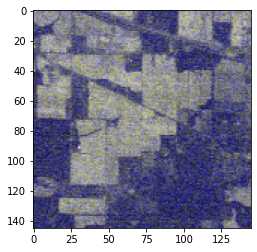

In [6]:
import spectral as sp
view = sp.imshow(indiana_pines, (145, 145, 199))

In [8]:
indiana_pines.shape

(145, 145, 200)

In [9]:
indiana_pines

array([[[3172, 4142, 4506, ..., 1057, 1020, 1020],
        [2580, 4266, 4502, ..., 1064, 1029, 1020],
        [3687, 4266, 4421, ..., 1061, 1030, 1016],
        ...,
        [2570, 3890, 4320, ..., 1042, 1021, 1015],
        [3170, 4130, 4320, ..., 1054, 1024, 1020],
        [3172, 3890, 4316, ..., 1043, 1034, 1016]],

       [[2576, 4388, 4334, ..., 1047, 1030, 1006],
        [2747, 4264, 4592, ..., 1055, 1039, 1015],
        [2750, 4268, 4423, ..., 1047, 1026, 1015],
        ...,
        [3859, 4512, 4605, ..., 1056, 1035, 1015],
        [3686, 4264, 4690, ..., 1051, 1012, 1020],
        [2744, 4268, 4597, ..., 1047, 1019, 1016]],

       [[2744, 4146, 4416, ..., 1055, 1029, 1025],
        [2576, 4389, 4416, ..., 1051, 1021, 1011],
        [2744, 4273, 4420, ..., 1068, 1033, 1010],
        ...,
        [2570, 4266, 4509, ..., 1051, 1025, 1010],
        [2576, 4262, 4496, ..., 1047, 1029, 1020],
        [2742, 4142, 4230, ..., 1042, 1025, 1011]],

       ...,

       [[3324, 3728, 400

ImageView object:
  Display bands       :  (145, 145, 5)
  Interpolation       :  <default>
  RGB data limits     :
    R: [989.0, 1087.0]
    G: [989.0, 1087.0]
    B: [4056.0, 7980.0]

ImageView object:
  Display bands       :  (145, 145, 5)
  Interpolation       :  <default>
  RGB data limits     :
    R: [989.0, 1087.0]
    G: [989.0, 1087.0]
    B: [4056.0, 7980.0]

ImageView object:
  Display bands       :  (145, 145, 5)
  Interpolation       :  <default>
  RGB data limits     :
    R: [989.0, 1087.0]
    G: [989.0, 1087.0]
    B: [4056.0, 7980.0]

ImageView object:
  Display bands       :  (145, 145, 5)
  Interpolation       :  <default>
  RGB data limits     :
    R: [989.0, 1087.0]
    G: [989.0, 1087.0]
    B: [4056.0, 7980.0]

ImageView object:
  Display bands       :  (145, 145, 5)
  Interpolation       :  <default>
  RGB data limits     :
    R: [989.0, 1087.0]
    G: [989.0, 1087.0]
    B: [4056.0, 7980.0]

ImageView object:
  Display bands       :  (145, 145, 5)
  Interp

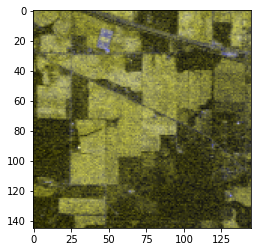

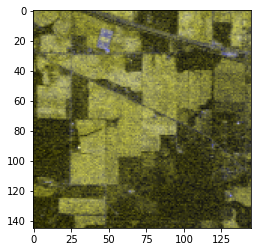

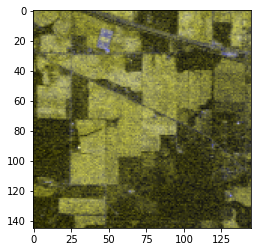

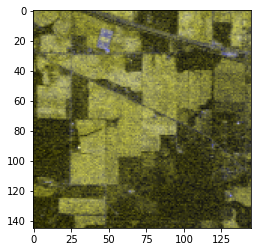

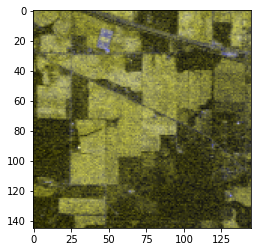

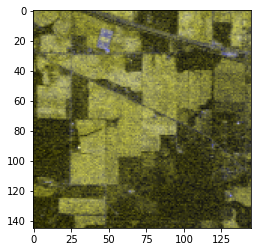

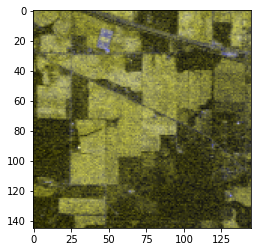

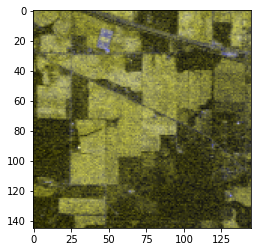

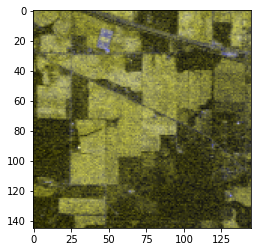

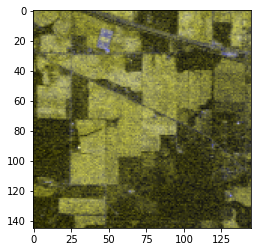

In [13]:
for i in range(10):
    view = sp.imshow(indiana_pines, (145, 145, 5))
    print(view)

In [15]:
ground_truth.shape

(145, 145)

In [16]:
ground_truth

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


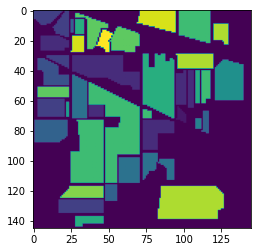

In [17]:
import matplotlib.pyplot as plt
plt.imshow(ground_truth)
print(np.unique(ground_truth))

In [18]:
flattened_image = np.reshape(indiana_pines,(-1,indiana_pines.shape[-1]))
flattened_ground = np.reshape(ground_truth,(-1,))

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=50))])
pca_image = pipeline.fit_transform(flattened_image)
svdpipeline = Pipeline([('scaling', StandardScaler()), ('svd', TruncatedSVD(n_components=50))])
svd_image = svdpipeline.fit_transform(flattened_image)

In [139]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_pipeline = Pipeline([('scaling', StandardScaler()), ('lda', LinearDiscriminantAnalysis(n_components=16))])
lda_image = lda_pipeline.fit_transform(flattened_image,flattened_ground)

In [41]:
from sklearn.decomposition import FastICA

In [ ]:
''' Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of 
correlated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in 
machine learning for predictive models. '''
# https://media.geeksforgeeks.org/wp-content/uploads/m.png

In [ ]:
''' Linear discriminant analysis (LDA) is used here to reduce the number of features to a more manageable number before the
process of classification. The linear combinations obtained using Fisher's linear discriminant are called Fisher faces. '''
# https://media.geeksforgeeks.org/wp-content/uploads/20190423132455/ldanewaxis.jpg

In [ ]:
''' Independent Component Analysis (ICA) is a machine learning technique to separate independent sources from a mixed signal.
Unlike principal component analysis which focuses on maximizing the variance of the data points, the independent component 
analysis focuses on independence, i.e. independent components '''
# https://media.geeksforgeeks.org/wp-content/uploads/20190521012201/ica.jpg

In [ ]:
''' The singular value decomposition (SVD) provides another way to factorize a matrix, into singular vectors and singular 
values '''
# http://habrastorage.org/files/855/a65/c62/855a65c624dc4174b526fb5e03b98555.png

In [135]:
ica_pipeline = Pipeline([('scaling', StandardScaler()), ('ica', FastICA(n_components=1))])
ica_image = ica_pipeline.fit_transform(flattened_image,flattened_ground)

In [66]:
norm_flattened = StandardScaler().fit_transform(flattened_image)

In [67]:
def flatten(X):
    if len(X.shape) <= 2:
        X = X
    else:
        X = np.reshape(X,(-1,X.shape[-1]))
    return X

In [68]:
def standard(X):
    from sklearn.preprocessing import StandardScaler
    return StandardScaler().fit_transform(flatten(X))

In [69]:
def unflatten(X,size=145):
    return np.reshape(X,(size,-1,X.shape[-1]))


In [70]:
class VarianceScorer:
    def __init__(self,X_perfect):
        self._original_variance = np.var(standard(X_perfect),axis = 0)
        self._original = flatten(X_perfect)
    
    def score(self,X):
        current_variance = np.var(flatten(X),axis = 0)
        return (sum(current_variance) / sum(self._original_variance))

In [71]:
def neighbour_score(X,mode="prepend"):
    d1 = np.linalg.norm(np.diff(X,axis = 0,prepend = 0),axis = -1)
    d2 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=0),axis = 0,prepend = 0),axis=0),axis=-1)
    d3 = np.linalg.norm(np.diff(X,axis = 1,prepend = 0),axis=-1)
    d4 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=1),axis = 1,prepend = 0),axis=1),axis=-1)
    return np.dstack([d1,d2,d3,d4])

In [72]:
class NeighbourhoodScorer:
    def __init__(self,X_perfect):
        self._original_neighbourhood = self._neighbour_score(X_perfect)
        self._original = flatten(X_perfect)
        
    def _neighbour_score(self,X,mode="wrap"):
        if mode == "prepend":
            # Results in ~0.99699-0.99853 for num_components~50-75
            d1 = np.linalg.norm(np.diff(X,axis = 0,prepend = 0),axis = -1)
            d2 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=0),axis = 0,prepend = 0),axis=0),axis=-1)
            d3 = np.linalg.norm(np.diff(X,axis = 1,prepend = 0),axis=-1)
            d4 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=1),axis = 1,prepend = 0),axis=1),axis=-1)
        elif mode == "wrap":
            # Results in ~0.99695-0.99852 for num_component~50-75
            d1 = np.linalg.norm(X - np.roll(X,shift=1,axis=0),axis = -1)
            d2 = np.linalg.norm(X - np.roll(X,shift=-1,axis=0),axis = -1)
            d3 = np.linalg.norm(X - np.roll(X,shift=1,axis=1),axis = -1)
            d4 = np.linalg.norm(X - np.roll(X,shift=-1,axis=1),axis = -1)
        return np.dstack([d1,d2,d3,d4])
    
    def score(self,X):
        current_mat = self._neighbour_score(X)
        return 1/(1+np.linalg.norm(current_mat - self._original_neighbourhood)/(current_mat.shape[0]*current_mat.shape[1]))
    
    def score1(self,X):
        current_mat = self._neighbour_score(X)
        scale = np.mean(current_mat,axis=(0,1)) / np.mean(self._original_neighbourhood,axis=(0,1))
        bias = np.mean(self._original_neighbourhood - (current_mat/scale))
        return 1/(1+np.linalg.norm((current_mat/scale) + bias - self._original_neighbourhood)/(current_mat.shape[0]*current_mat.shape[1]))

In [153]:
Scorer = VarianceScorer(indiana_pines)
pca_vs=Scorer.score(pca_image)
pca_vs

0.9932755093949709

In [154]:
Scorer = VarianceScorer(indiana_pines)
svd_vs=Scorer.score(svd_image)
svd_vs

0.9932797252641883

In [155]:
Scorer = VarianceScorer(indiana_pines)
lda_vs=Scorer.score(lda_image)
lda_vs

0.11747277907766614

In [156]:
Scorer = VarianceScorer(indiana_pines)
ica_vs=Scorer.score(ica_image)
ica_vs

2.3781212841854976e-07

In [61]:
%timeit Scorer.score(svd_image)

7.86 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [62]:
%timeit Scorer.score(lda_image)

2.46 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [63]:
%timeit Scorer.score(pca_image)

8.67 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [99]:
%timeit Scorer.score(ica_image)

6.96 ms ± 243 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [146]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(indiana_pines),145))
pca_ns=Scorer1.score1(unflatten(pca_image,145))
pca_ns

0.9969555718784006

In [147]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(indiana_pines),145))
lda_ns=Scorer1.score1(unflatten(lda_image,145))
lda_ns

0.9617673377137601

In [148]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(indiana_pines),145))
ica_ns=Scorer1.score1(unflatten(ica_image,145))
ica_ns

0.9124856436171691

In [149]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(indiana_pines),145))
svd_ns=Scorer1.score1(unflatten(svd_image,145))
svd_ns

0.9969552588749355

In [106]:
%timeit Scorer1.score1(unflatten(svd_image,145))

63.2 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [108]:
%timeit Scorer1.score1(unflatten(pca_image,145))

68.1 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [109]:
%timeit Scorer1.score1(unflatten(lda_image,145))

20.9 ms ± 834 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [110]:
%timeit Scorer1.score1(unflatten(ica_image,145))

54.8 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


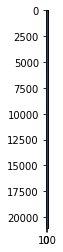

In [117]:
plt.imshow(flattened_image)

In [157]:
#variance scores 
print("PCA Variance Score:",pca_vs*100)
print("LDA Variance Score:",lda_vs*100)
print("ICA Variance Score:",ica_vs*100)
print("SVD Variance Score:",svd_vs*100)


PCA Variance Score: 99.32755093949709
LDA Variance Score: 11.747277907766614
ICA Variance Score: 2.3781212841854975e-05
SVD Variance Score: 99.32797252641883


In [159]:
#Neighbour hood scores
print("PCA NeighbourHood Score:,",pca_ns*100)
print("LDA NeighbourHood Score:",lda_ns*100)
print("ICA NeighbourHood Score:",ica_ns*100)
print("SVD NeighbourHood Score:",svd_ns*100)


PCA NeighbourHood Score:, 99.69555718784005
LDA NeighbourHood Score: 96.176733771376
ICA NeighbourHood Score: 91.24856436171692
SVD NeighbourHood Score: 99.69552588749355


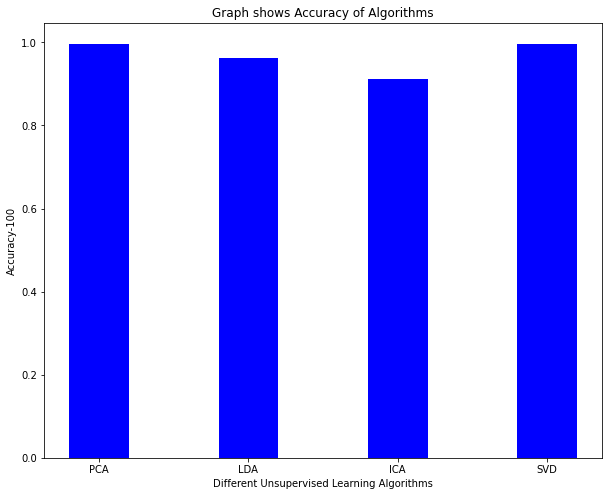

In [167]:
#NeighbourHood Scores are much better than Variance Scores

# creating the dataset
data = {'PCA':pca_ns, 'LDA':lda_ns, 'ICA':ica_ns,'SVD':svd_ns}

courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 8))

# creating the bar plot
plt.bar(courses, values, color ='blue',width = 0.4)

plt.xlabel("Different Unsupervised Learning Algorithms")
plt.ylabel("Accuracy-100")
plt.title("Graph shows Accuracy of Algorithms")
plt.show()


In [ ]:
# From Above graph we came to conclude that 
# Both PCA and SVD are efficient on Indian Pines Dataset